# **LINEAR REGRESSION BLOCK START**

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def load_dataset():
    """ Reads dataset csv and returns pandas dataframe """
    
    filepath = "D:\\PYTHON_PROJECTS_FALL2022\\.venv\\baseball_salary_analysis\\Hitters_Adjusted_Salary.csv"

    df = pd.read_csv(filepath, encoding="utf-8", low_memory=False)
    
    return df

In [4]:
def clean_dataset(a_df):
    """ Returns deduped, na-dropped, index-reset dataframe """    
    
    a_df = a_df.drop_duplicates()   
        
    a_df = a_df.dropna()
    
    a_df = a_df.drop(["Unnamed: 0", "playerID", "teamID", "lgID", "salary", "PO", "A", "E", "DP"], axis=1)
    
    totalhits = a_df["H"]
    doubles = a_df["2B"]
    triples = a_df["3B"]
    homeruns = a_df["HR"]
    atbats = a_df["AB"]
    walks = a_df["BB"]
    hit_by_pitch = a_df["HBP"]
    sac_hits = a_df["SH"]
    sac_flies = a_df["SF"]
    singles = (totalhits - homeruns - triples - doubles)
        
    a_df["slug_%"] = (singles + 2*doubles + 3*triples + 4*homeruns) / atbats
    a_df["slug_%"] = a_df["slug_%"].fillna(0)
    a_df["avg"] = totalhits / atbats
    a_df["avg"] = a_df["avg"].fillna(0)
    a_df["plate_appearances"] = atbats + walks + hit_by_pitch + sac_hits + sac_flies
    a_df["avg"] = a_df["avg"].fillna(0)
    a_df["on_base_%"] = (totalhits + walks + hit_by_pitch) / (atbats + walks + hit_by_pitch + sac_flies)
    a_df["on_base_%"] = a_df["on_base_%"].fillna(0)
    a_df["1B"] = singles
    a_df["1B"] = a_df["1B"].fillna(0)
    a_df["year_for_salary"] = a_df["yearID"] + 1 
    a_df = a_df.drop(["yearID"], axis=1)
     
    a_df = a_df.reset_index(drop=True)
    
    return a_df  

In [5]:
def rename_columns(a_df):
    """ Returns dataframe with meaningful column names """    
    
    abbr_dict = {"GS": "games_started", "InnOuts": "inning_outs", "G": "games_played", "AB": "at_bats",\
                "R": "runs", "H": "total_hits", "1B": "singles", "2B": "doubles", "3B": "triples", "HR": "home_runs",\
                "RBI": "runs_batted_in", "SB": "stolen_bases", "CS": "caught_stealing", "BB": "base_on_balls",\
                "SO": "strike_outs", "IBB": "intentional_walks", "HBP": "hit_by_pitch", "SH": "sacrifice_hits",\
                "SF": "sacrifice_flies", "GIDP": "ground_into_double_play"}
    
    a_df = a_df.rename(columns=abbr_dict)
    
    return a_df   

In [6]:
def examine_dataset(a_df):
    """ Provides summary info and visualizations of dataset """
    
    print(a_df.info())
          
    a_df.hist(figsize = (15, 15))  

In [7]:
def round_salaries(a_df):
    """ Returns dataframe with salary column made into int and rounded """

    a_df["ADJ Salary"] = a_df["ADJ Salary"].astype("int").round()

    return a_df

In [8]:
def run_regression(a_df, salary_col_name="ADJ Salary"):
    """ Runs linear regression on dataframe, prints model scores """

    # Assign X and y
    
    

    X = a_df.drop(columns=[salary_col_name, "salary"], axis=1)
    y = a_df[salary_col_name]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression().fit(X_train_scaled, y_train)
    
    predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 
    
    # Score the model

    print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
    print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")  
    
    plt.bar(np.arange(len(model.coef_)), model.coef_)
    plt.title(f'Linear Regression coefficient plot')
    plt.show()  

In [9]:
def run_LASSO(a_df):
    """ Runs LASSO regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso_reg = Lasso().fit(X_train, y_train)

    predicted = lasso_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"LASSO Regression Training Data Score: {lasso_reg.score(X_train_scaled, y_train)}")
    print(f"LASSO Regression Testing Data Score: {lasso_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(lasso_reg.coef_)), lasso_reg.coef_)
    plt.title(f'LASSO Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(lasso_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Lasso())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_lasso_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_lasso_reg.score(X_selected_test_scaled, y_test)}")

In [10]:
def run_Ridge(a_df):
    """ Runs Ridge regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge_reg = Ridge().fit(X_train, y_train)

    predicted = ridge_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"Ridge Regression Training Data Score: {ridge_reg.score(X_train_scaled, y_train)}")
    print(f"Ridge Regression Testing Data Score: {ridge_reg.score(X_test_scaled, y_test)}")

    plt.bar(np.arange(len(ridge_reg.coef_)), ridge_reg.coef_)
    plt.title(f'Ridge Regression coefficient plot')
    plt.show()     
    
    sel = SelectFromModel(ridge_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Ridge())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_ridge_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_ridge_reg.score(X_selected_test_scaled, y_test)}")

In [11]:
def run_ElasticNet(a_df):
    """ Runs ElasticNet regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_of_salary"], axis=1)
    y = a_df["log_of_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elasticnet_reg = ElasticNet().fit(X_train, y_train)
      
    predicted = elasticnet_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"ElasticNet Regression Training Data Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
    print(f"ElasticNet Regression Testing Data Score: {elasticnet_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(elasticnet_reg.coef_)), elasticnet_reg.coef_)
    plt.title(f'ElasticNet Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(elasticnet_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=ElasticNet())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_elasticnet_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    print(f"New linear regression score: {new_elasticnet_reg.score(X_selected_test_scaled, y_test)}")

In [12]:
loaded_df = load_dataset()

In [ ]:
# loaded_df["ADJ Salary"] = loaded_df["ADJ Salary"].astype(int)

# loaded_df = loaded_df.loc[~(loaded_df["ADJ Salary"] <= 0), :]

In [14]:
df = loaded_df.copy()

# totalhits = df["H"]
# doubles = df["2B"]
# triples = df["3B"]
# homeruns = df["HR"]
# atbats = df["AB"]
# walks = df["BB"]
# hit_by_pitch = df["HBP"]
# sac_hits = df["SH"]
# sac_flies = df["SF"]
# singles = (totalhits - homeruns - triples - doubles)

# df["slug_%"] = (singles + 2*doubles + 3*triples + 4*homeruns) / atbats
# df["slug_%"] = df["slug_%"].fillna(0)
# df["avg"] = totalhits / atbats
# df["avg"] = df["avg"].fillna(0)
# df["plate_appearances"] = atbats + walks + hit_by_pitch + sac_hits + sac_flies
# df["avg"] = df["avg"].fillna(0)
# df["on_base_%"] = (totalhits + walks + hit_by_pitch) / (atbats + walks + hit_by_pitch + sac_flies)
# df["on_base_%"] = df["on_base_%"].fillna(0)
# df["1B"] = singles
# df["1B"] = df["1B"].fillna(0)

df["ADJ Salary"] = df["ADJ Salary"].astype("int").round()

# df["ADJ Salary"] = np.log(df["ADJ Salary"])

df = df.dropna().reset_index(drop=True)

agg_df = df.groupby(["playerID"]).mean()

agg_df = agg_df.drop(columns=["Unnamed: 0"])

agg_df

,yearID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,,,,,,
abbotje01,1999.500000,246250.000000,373918.500000,34.000000,887.000000,71.000000,0.5,2.000000,0.000000,53.500000,139.500000,18.500000,36.750000,8.000000,0.500000,4.250000,20.250000,1.500000,1.250000,9.500000,21.250000,0.500000,0.750000,1.250000,1.750000,2.250000
abbotku01,1997.100000,523700.000000,825024.000000,54.700000,1460.200000,101.600000,135.6,9.100000,29.600000,70.200000,204.400000,27.300000,52.300000,10.900000,2.300000,6.200000,24.200000,2.200000,1.100000,13.300000,57.100000,1.100000,1.700000,2.100000,1.200000,3.700000
abercre01,2006.000000,327000.000000,419797.000000,67.000000,1862.000000,176.000000,3.0,5.000000,1.000000,111.000000,255.000000,39.000000,54.000000,12.000000,2.000000,5.000000,24.000000,6.000000,5.000000,18.000000,78.000000,2.000000,3.000000,4.000000,1.000000,2.000000
abernbr01,2002.666667,271666.666667,384418.333333,43.000000,1167.666667,93.000000,124.0,4.666667,31.000000,43.000000,165.666667,16.333333,38.000000,6.000000,1.333333,0.666667,13.333333,3.666667,1.333333,8.666667,16.333333,0.000000,2.000000,3.333333,0.666667,3.333333
abnersh01,1990.166667,150583.333333,290245.833333,40.500000,1204.000000,116.833333,2.0,0.333333,0.500000,62.666667,132.166667,14.000000,29.666667,6.000000,0.500000,1.500000,10.666667,0.833333,1.333333,6.833333,24.166667,1.666667,1.166667,0.833333,1.166667,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuberjo01,1996.000000,109000.000000,179798.000000,20.000000,543.000000,145.000000,11.0,2.000000,10.000000,30.000000,91.000000,7.000000,23.000000,4.000000,0.000000,1.000000,10.000000,1.000000,0.000000,6.000000,11.000000,1.000000,0.000000,1.000000,1.000000,3.000000
zuletju01,2001.000000,200000.000000,292276.000000,23.000000,657.000000,213.000000,7.0,2.000000,11.000000,49.000000,106.000000,11.000000,23.000000,3.000000,0.000000,6.000000,24.000000,0.000000,1.000000,8.000000,32.000000,1.000000,3.000000,0.000000,1.000000,3.000000
zuninmi01,2014.500000,513800.000000,561370.500000,113.000000,3061.000000,909.500000,64.0,5.000000,5.500000,121.500000,394.000000,39.500000,74.000000,15.500000,1.000000,16.500000,44.000000,0.000000,2.000000,19.000000,145.000000,0.500000,11.000000,4.000000,3.000000,9.000000


In [ ]:
loaded_df.info()

In [ ]:
loaded_df.sample(100)

MSE: 2809806805919.6387
R2: 0.5637585808325788
Linear Regression Training Data Score: 0.6280317082272014
Linear Regression Testing Data Score: 0.5637585808325788


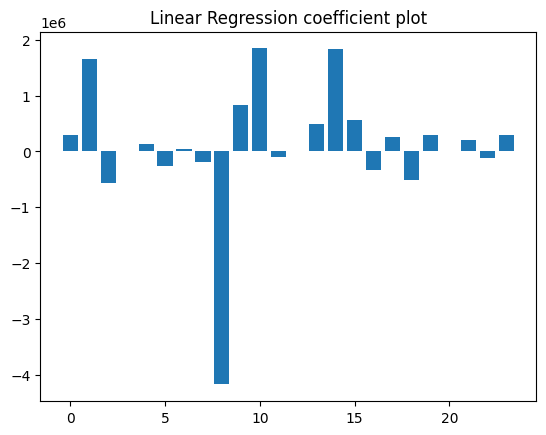

In [15]:
run_regression(agg_df, "ADJ Salary")

In [ ]:
clean_df = clean_dataset(loaded_df)

In [ ]:
clean_df = rename_columns(clean_df)

In [ ]:
clean_df.head(10)

In [ ]:
examine_dataset(clean_df)

In [ ]:
clean_df = round_salaries(clean_df)

In [ ]:
clean_df["log_of_salary"] = np.log(clean_df["ADJ Salary"])

In [ ]:
clean_df["log_of_salary"].describe()

In [ ]:
clean_df

In [ ]:
run_regression(agg_df, "ADJ Salary")

In [ ]:
run_regression(clean_df, "log_of_salary")

In [ ]:
run_LASSO(clean_df)

In [ ]:
run_Ridge(clean_df)

In [ ]:
run_ElasticNet(clean_df)

# Results:

- Using the logarithm of the ADJ Salary column values improved the regression score
    - I had to eliminate any salary values <= 0 to make this work
- Ridge regression achieved the best score: 0.7291495360671353

# To Do:

- Add / remove features from the dataset?


# **LINEAR REGRESSION BLOCK END**

# **PCA START BLOCK**

# **PCA END BLOCK**
